In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
print(tf.__version__) #version should be at least 1.15.x

2.8.0


In [32]:
clases = ['Taxi', "Minibus", "Teleferico", "Puma"]

In [38]:
input = pd.read_csv("dataset1.csv")
output = pd.read_csv("output.csv")
#aux = np.array([1, 0, 3, 0, 3, 1, 2, 0, 1, 0, 1, 2])
train_values = input.to_numpy()[0:-3]
train_labels = output.to_numpy()[0:-3]

test_values = input.to_numpy()[-3:]
test_labels = output.to_numpy()[-3:]

print(train_values[0])
print(train_labels[0])
print(test_values[0])
print(test_labels[0])


[ 3.4   0.6  15.    0.8  15.    3.3   0.85  2.    0.8  25.    1.1   0.35
  5.    0.85 22.    3.4   0.75  2.5   0.5  24.   25.    3.  ]
[1]
[ 1.9   0.65 12.    0.9   8.    1.9   0.65  2.    0.75 15.    1.1   0.2
  5.    0.85 14.    1.1   0.65  4.5   0.6  17.   12.   15.  ]
[0]


In [34]:
model = Sequential()
model.add(Dense(22, input_shape=[22]))
model.add(Dense(26, activation='relu'))
model.add(Dense(26, activation='relu'))
model.add(Dense(4, activation='softmax'))


![prueba](https://d3c33hcgiwev3.cloudfront.net/imageAssetProxy.v1/bn9SyaDIEeav5QpTGIv-Pg_0d06dca3d225f3de8b5a4a7e92254153_Screenshot-2016-11-01-23.48.26.png?expiry=1652486400000&hmac=2vGfNnahx15IZeOWZnh2IkKX1Kswn58Y_w2vlQV3sSY)

Epoch 1/30
1/1 [==============================] - 1s 535ms/step - loss: 8.0854 - accuracy: 0.1111 - val_loss: 6.1147 - val_accuracy: 0.3333
Epoch 2/30
1/1 [==============================] - 0s 35ms/step - loss: 7.2759 - accuracy: 0.1111 - val_loss: 5.6118 - val_accuracy: 0.3333
Epoch 3/30
1/1 [==============================] - 0s 34ms/step - loss: 6.5362 - accuracy: 0.1111 - val_loss: 5.1536 - val_accuracy: 0.3333
Epoch 4/30
1/1 [==============================] - 0s 34ms/step - loss: 5.8839 - accuracy: 0.1111 - val_loss: 4.7532 - val_accuracy: 0.3333
Epoch 5/30
1/1 [==============================] - 0s 28ms/step - loss: 5.2803 - accuracy: 0.1111 - val_loss: 4.3797 - val_accuracy: 0.3333
Epoch 6/30
1/1 [==============================] - 0s 30ms/step - loss: 4.7547 - accuracy: 0.1111 - val_loss: 4.0426 - val_accuracy: 0.3333
Epoch 7/30
1/1 [==============================] - 0s 29ms/step - loss: 4.3127 - accuracy: 0.0000e+00 - val_loss: 3.7437 - val_accuracy: 0.0000e+00
Epoch 8/30
1/1 [==

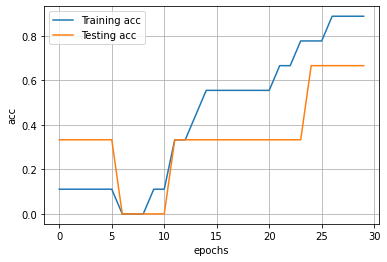

In [35]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

log = model.fit(train_values, 
                train_labels, 
                epochs = 30,
                validation_data = (test_values, test_labels))

# make predictions for test data
predictions = model.predict(test_values)

# plot accuracy per epoch
plt.plot(log.history['accuracy'], label='Training acc')
plt.plot(log.history['val_accuracy'], label='Testing acc')
plt.xlabel("epochs")
plt.ylabel("acc")
plt.legend()
plt.grid()


In [37]:

aux = 1
print(predictions)
for i in predictions:
    predicted_label = np.argmax(i)
    print("la prediccion para el dato de entrenamiento " + str(aux) + " es: " + clases[predicted_label])
    aux = aux +1

[[0.59037036 0.168163   0.15038459 0.09108206]
 [0.19306988 0.5817876  0.10459334 0.1205492 ]
 [0.04553621 0.8073803  0.09350013 0.05358333]]
la prediccion para el dato de entrenamiento 1 es: Taxi
la prediccion para el dato de entrenamiento 2 es: Minibus
la prediccion para el dato de entrenamiento 3 es: Minibus
